In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
df_train = pd.read_csv("./house-prices/train.csv")
df_train.shape

(1460, 81)

In [2]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [5]:
#less than 85% of the entries have these data. so we drop them alone with the "Id" column
clean_housing_df = df_train.drop(["Id","Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "LotFrontage"], axis=1)

In [6]:
clean_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [7]:
corr_matrix = clean_housing_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

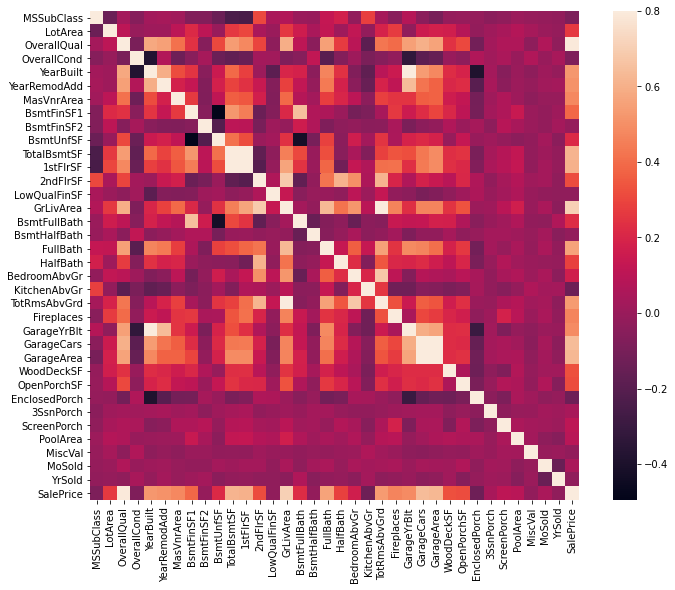

In [8]:
# correlation heatmap
corrmat = clean_housing_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

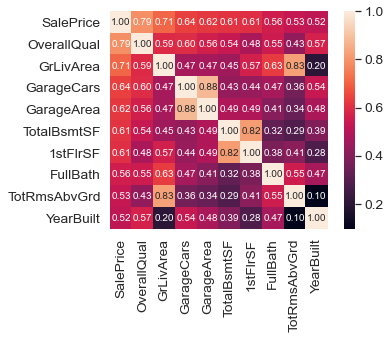

In [9]:
#Another saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(clean_housing_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivA

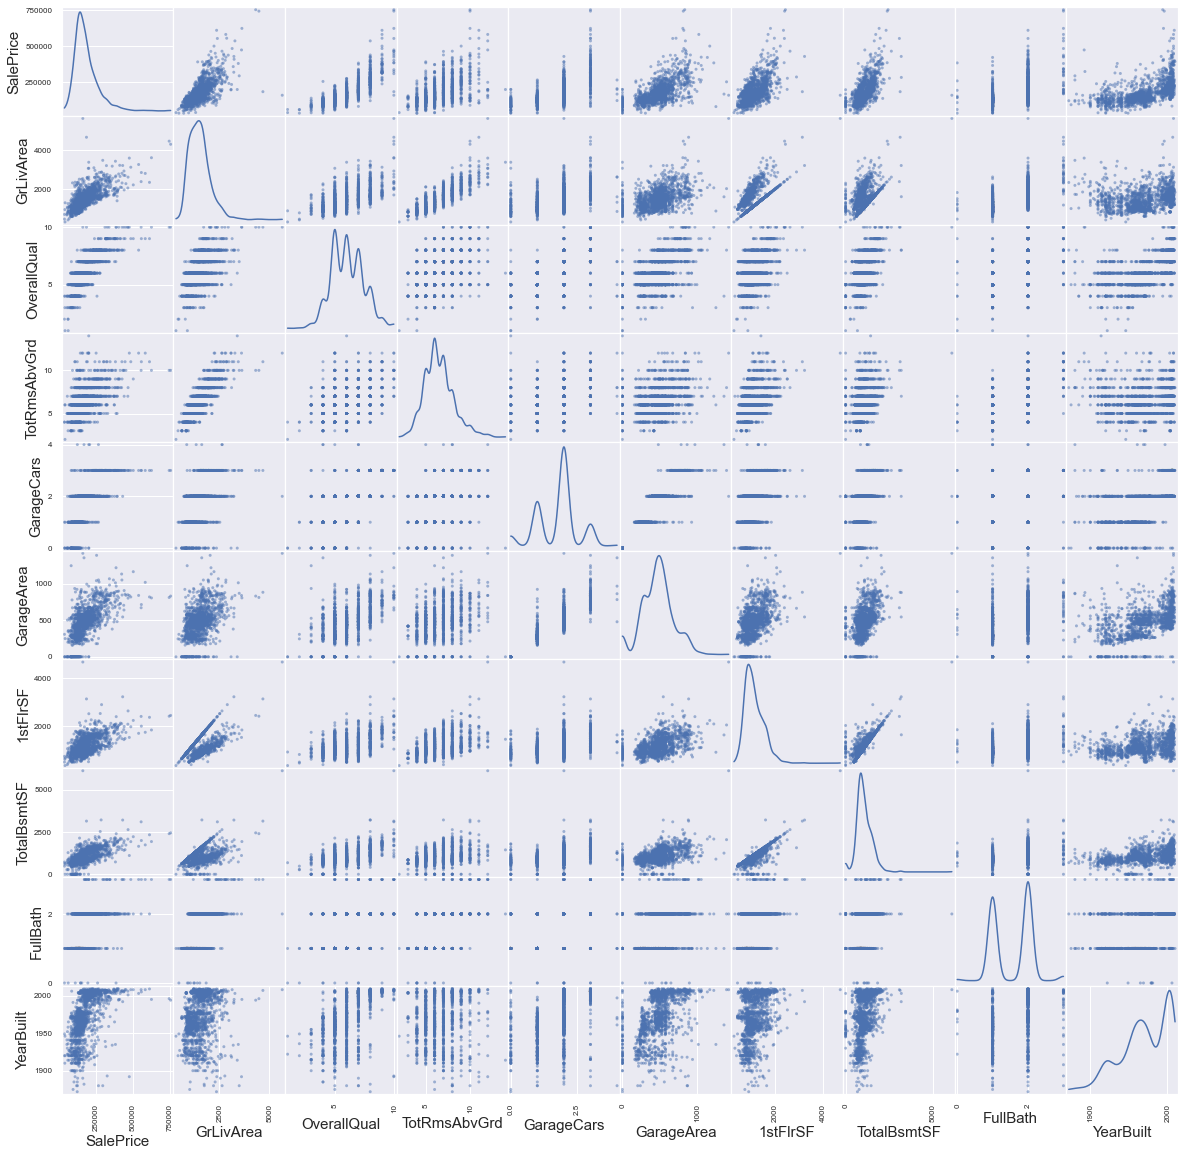

In [10]:
# explore the relationship between sale price and the top correlated artibutes
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","GrLivArea","OverallQual","TotRmsAbvGrd","GarageCars","GarageArea","1stFlrSF","TotalBsmtSF","FullBath", "YearBuilt"]
scatter_matrix(clean_housing_df[attributes], figsize=(20, 20), diagonal ="kde")

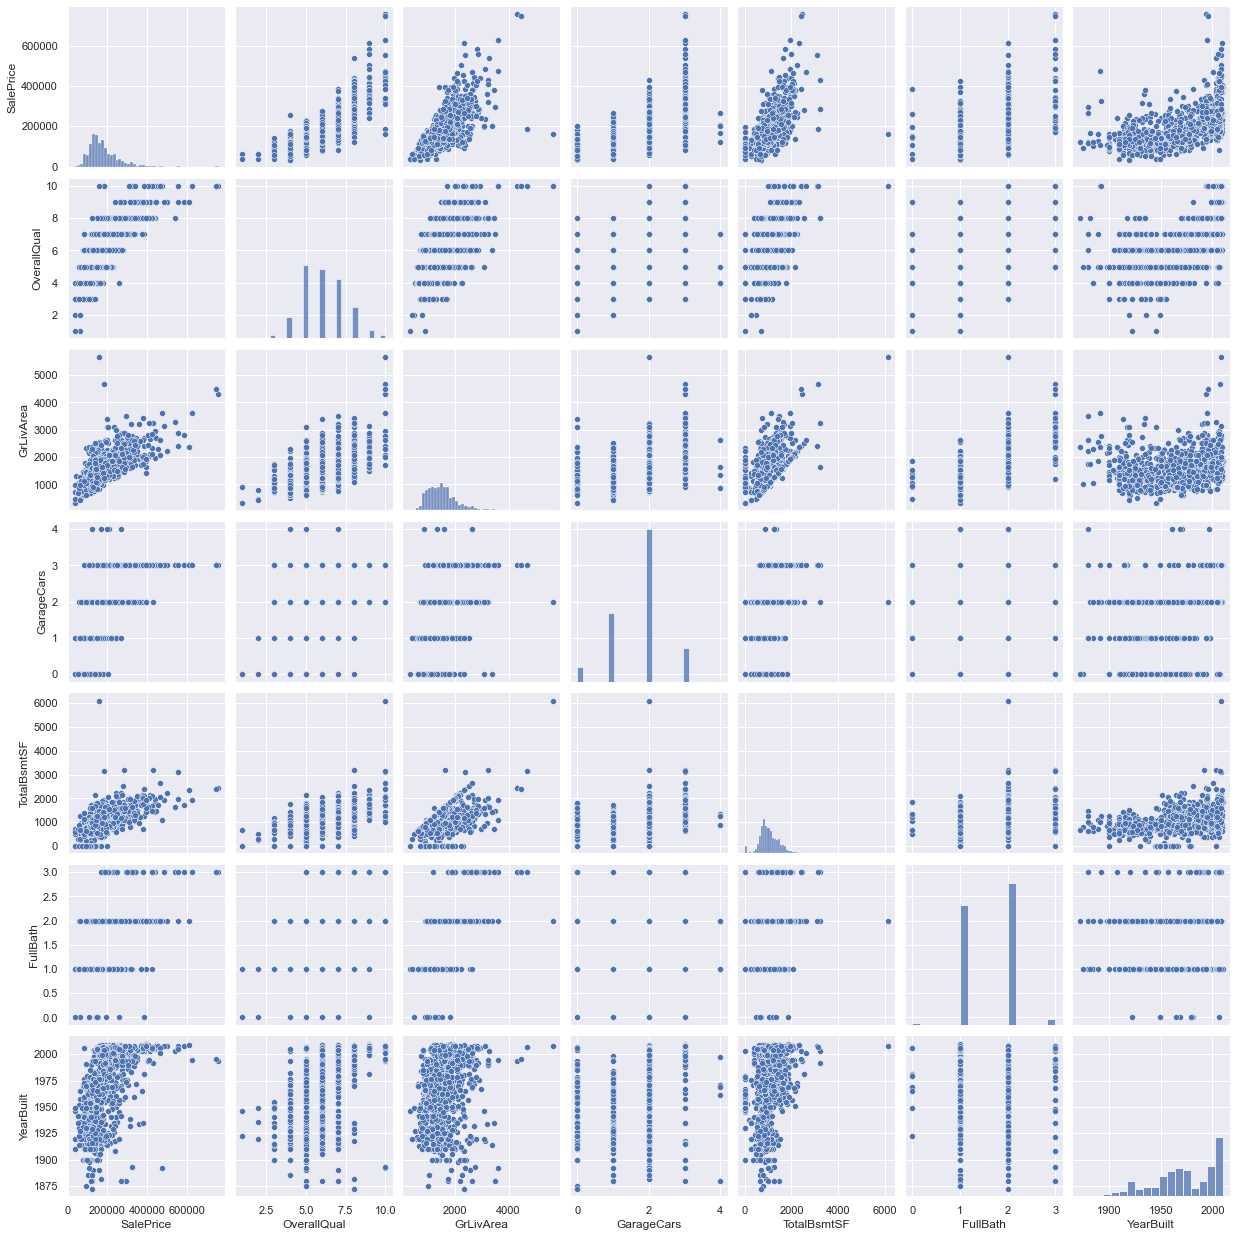

In [11]:
# another scatter plot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(clean_housing_df[cols], height = 2.5)
plt.show();

In [12]:
#looking for outliers
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(clean_housing_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<ipython-input-12-4624f3e99d56>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(clean_housing_df['SalePrice'][:,np.newaxis]);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


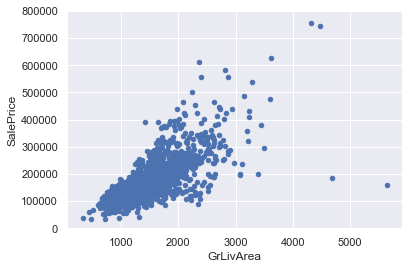

In [13]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([clean_housing_df['SalePrice'], clean_housing_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [14]:
clean_housing_df.nlargest(10, "GrLivArea")[["GrLivArea","SalePrice"]]

,GrLivArea,SalePrice
1298,5642,160000
523,4676,184750
1182,4476,745000
691,4316,755000
1169,3627,625000
185,3608,475000
304,3493,295000
1268,3447,381000
635,3395,200000
769,3279,538000


In [15]:
#top 3 are not consistant with the rest of the data, drop them
clean_housing_df = clean_housing_df.drop([1298, 523])
clean_housing_data = clean_housing_df.reset_index(drop=True)
clean_housing_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1454,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1455,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1456,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


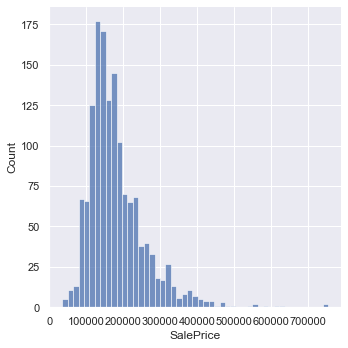

In [16]:
import seaborn as sns
sns.displot(clean_housing_data['SalePrice']);

In [17]:
print("Skewness: %f" % clean_housing_data['SalePrice'].skew())
print("Kurtosis: %f" % clean_housing_data['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


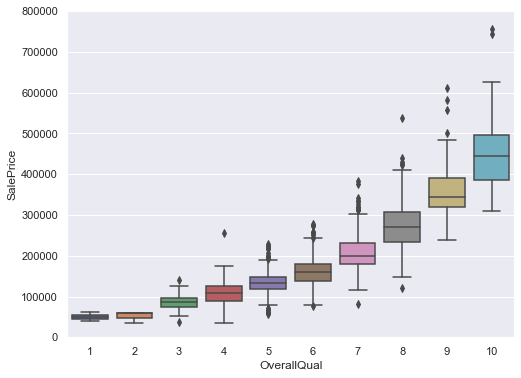

In [18]:
var = 'OverallQual'
data = pd.concat([clean_housing_data['SalePrice'], clean_housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


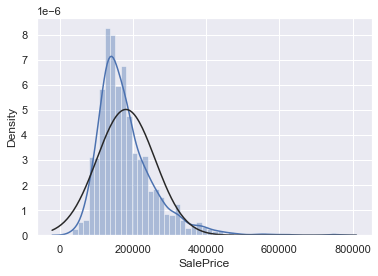

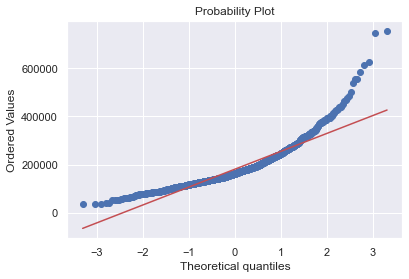

In [19]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(clean_housing_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(clean_housing_data['SalePrice'], plot=plt)

In [20]:
#applying log transformation
clean_housing_data_SalePrice_log = pd.DataFrame(np.log(clean_housing_data['SalePrice']), columns = {"SalePrice"}, index = clean_housing_data.index)
clean_housing_data_SalePrice_log

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


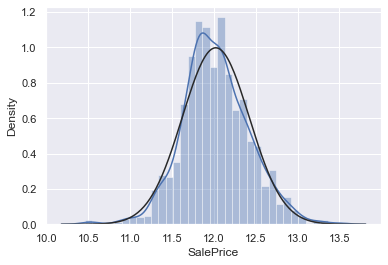

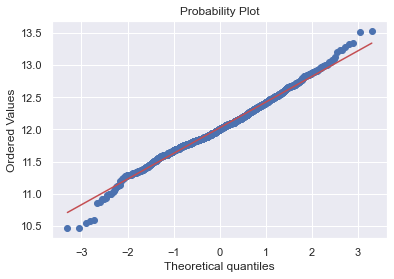

In [21]:
#transformed histogram and normal probability plot
sns.distplot(clean_housing_data_SalePrice_log['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(clean_housing_data_SalePrice_log['SalePrice'], plot=plt)

C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


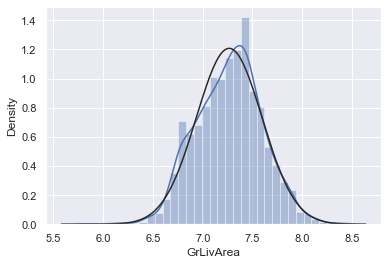

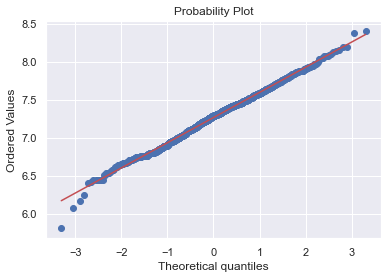

In [22]:
#histogram and normal probability plot
#data transformation
clean_housing_data_GrLivArea_log = pd.DataFrame(np.log(clean_housing_data['GrLivArea']), columns={"GrLivArea"}, index = clean_housing_data.index)
sns.distplot(clean_housing_data_GrLivArea_log['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(clean_housing_data_GrLivArea_log['GrLivArea'], plot=plt)

In [23]:
clean_housing_data_GrLivArea_log

,GrLivArea
0,7.444249
1,7.140453
2,7.487734
3,7.448334
4,7.695303
...,...
1453,7.406711
1454,7.636752
1455,7.757906
1456,6.982863


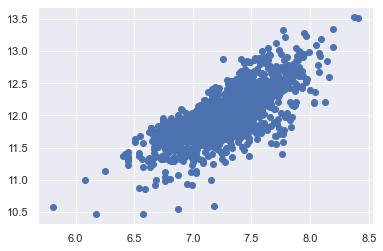

In [24]:
#scatter plot again after log transformation
plt.scatter(clean_housing_data_GrLivArea_log, clean_housing_data_SalePrice_log);

In [25]:
#apply log to some columns which are not close to normal distributuion (did't apply to columns with "0" values because log appy to 0 will result to devided by 0)
clean_housing_data["SalePrice"] = np.log(clean_housing_data["SalePrice"])
clean_housing_data["GrLivArea"] = np.log(clean_housing_data["GrLivArea"])
clean_housing_data["LotArea"] = np.log(clean_housing_data["LotArea"])
clean_housing_data["1stFlrSF"] = np.log(clean_housing_data["1stFlrSF"])

In [26]:
clean_housing_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,8.976768,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1454,20,RL,9.486076,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1455,70,RL,9.109636,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1456,20,RL,9.181632,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


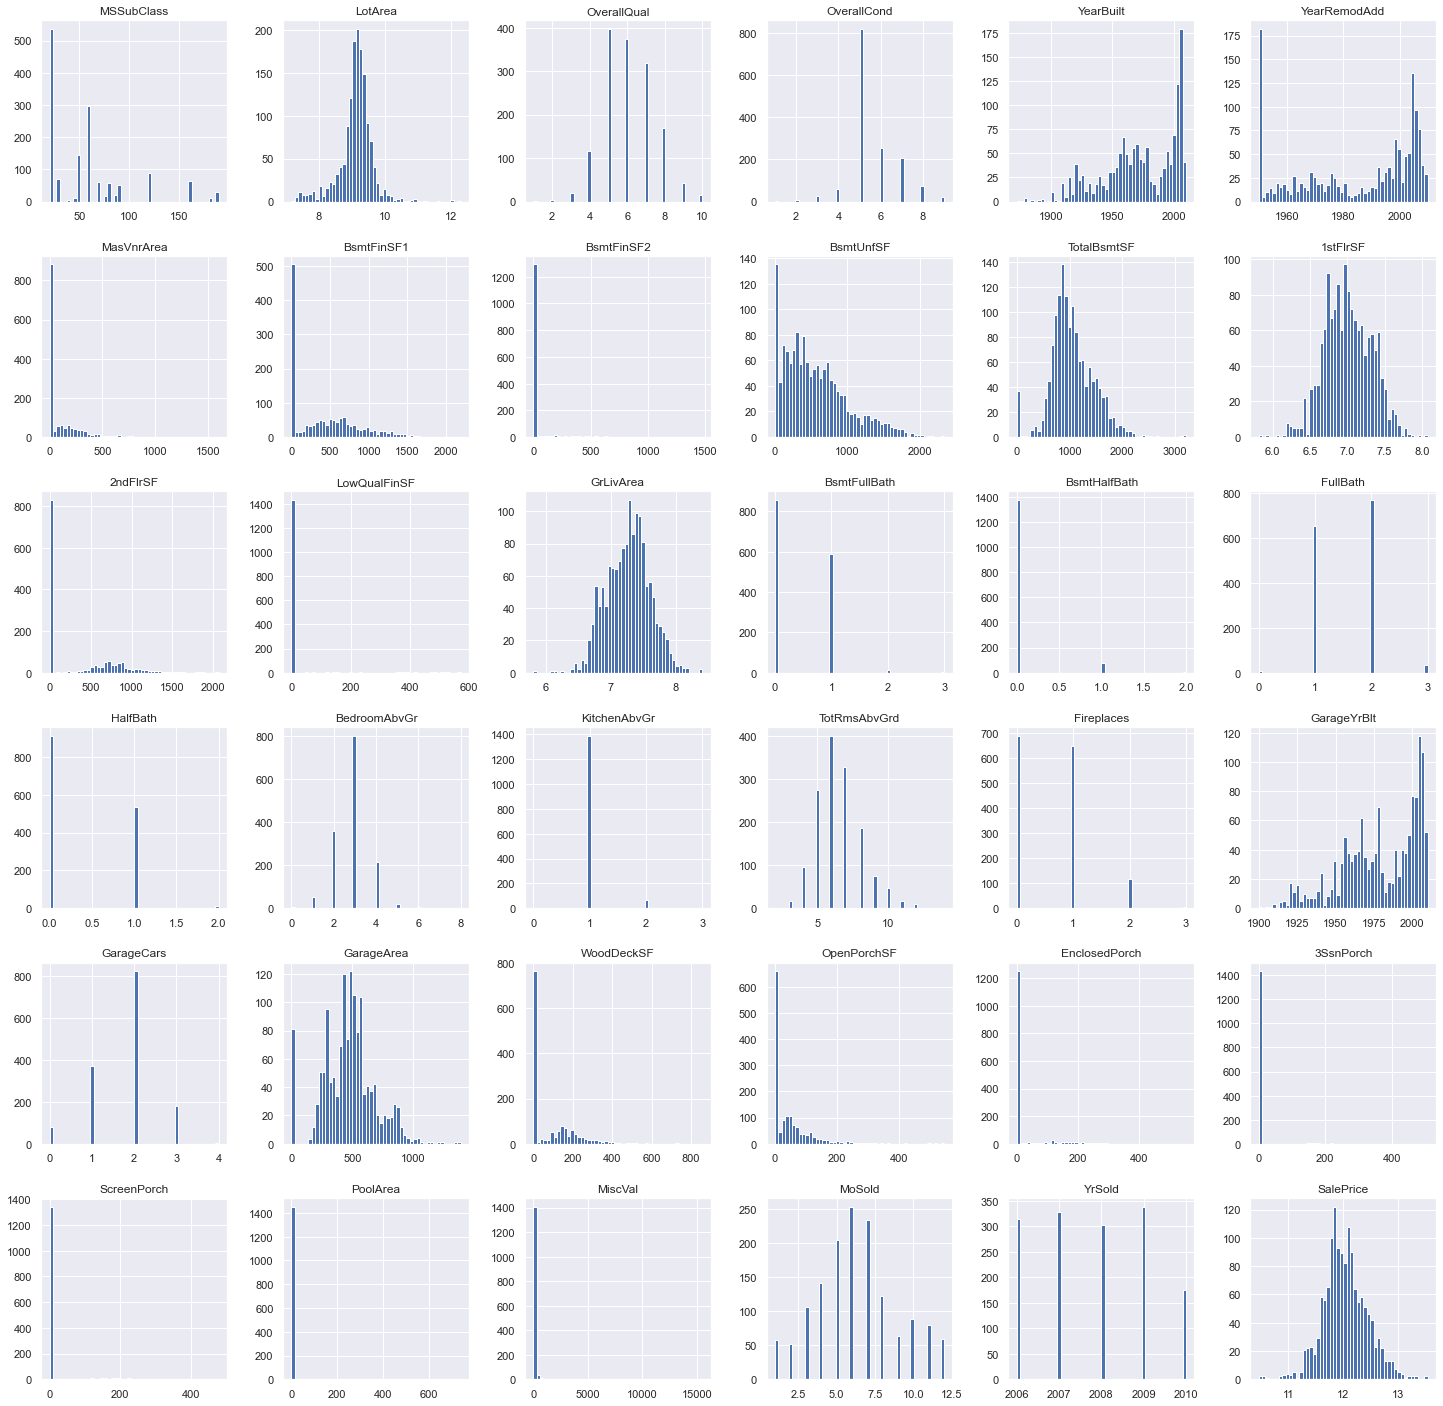

In [27]:
# one more look at all the data
import matplotlib.pyplot as plt
clean_housing_data.hist(bins=50, figsize=(25,25))
plt.show()

In [28]:
#splite data to train set and test set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = split_train_test(clean_housing_data, 0.2)


In [30]:
train_set

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
6,20,RL,9.218705,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,12.634603
717,60,RL,9.263123,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,...,216,0,0,0,0,8,2008,WD,Normal,12.739638
210,30,RL,8.631236,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,96,0,0,0,0,4,2008,WD,Normal,11.492723
963,60,RL,9.333973,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,...,0,0,0,0,0,2,2010,WD,Normal,12.277928
431,50,RM,8.628019,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,0,9,2008,ConLD,Abnorml,11.288531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,60,RL,9.411157,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,...,0,0,0,0,0,7,2009,WD,Normal,12.404924
1387,50,RM,8.699515,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,0,3,2007,WD,Normal,11.782953
132,20,RL,8.907612,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,7,2007,WD,Normal,11.923378
1296,180,RM,8.209308,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,6,2006,New,Partial,11.849398


In [31]:
test_set

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
468,20,RL,9.343822,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,5,2007,WD,Normal,12.429216
552,20,RL,9.079890,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,5,2009,WD,Normal,11.589887
978,20,RL,9.084324,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,...,0,0,0,0,0,6,2009,WD,Normal,11.842229
1450,180,RM,8.209308,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,5,2006,WD,Normal,11.884489
1088,120,FV,8.106515,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,4,2006,WD,Normal,12.190959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,160,RM,7.860185,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,4,2010,WD,Normal,11.350407
873,50,RM,8.651724,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,0,8,2009,WD,Abnorml,11.104957
402,30,RL,9.230143,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,8,2008,WD,Normal,11.589887
707,60,RL,9.106978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,7,2007,New,Partial,12.098153


In [32]:
train_cat = train_set.select_dtypes(include=['object'])
train_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
717,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
210,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,FuseA,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
963,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal
431,RM,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,N,ConLD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,RFn,TA,TA,Y,WD,Normal
1387,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
132,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1296,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Basment,Fin,TA,TA,Y,New,Partial


In [33]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(train_cat)
imputer_cat.transform(train_cat)
train_cat_tr = pd.DataFrame(imputer_cat.transform(train_cat), columns=train_cat.columns, index=train_cat.index)
train_cat_tr

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
717,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
210,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,FuseA,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
963,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal
431,RM,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,N,ConLD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,RFn,TA,TA,Y,WD,Normal
1387,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
132,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1296,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Basment,Fin,TA,TA,Y,New,Partial


In [34]:
train_num = train_set.select_dtypes(exclude=['object'])
train_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
6,20,9.218705,8,5,2004,2005,186.0,1369,0,317,...,255,57,0,0,0,0,0,8,2007,12.634603
717,60,9.263123,7,5,1993,1994,651.0,1173,0,138,...,250,154,216,0,0,0,0,8,2008,12.739638
210,30,8.631236,5,6,1925,1950,0.0,468,0,396,...,0,0,96,0,0,0,0,4,2008,11.492723
963,60,9.333973,7,5,2002,2003,44.0,624,0,193,...,0,40,0,0,0,0,0,2,2010,12.277928
431,50,8.628019,6,7,1920,1998,0.0,0,0,901,...,0,98,0,0,0,0,0,9,2008,11.288531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,60,9.411157,6,5,2000,2000,40.0,695,0,297,...,24,48,0,0,0,0,0,7,2009,12.404924
1387,50,8.699515,6,6,1941,1950,0.0,375,0,360,...,0,0,0,0,0,0,0,3,2007,11.782953
132,20,8.907612,5,6,1959,2002,0.0,405,0,658,...,0,0,0,0,0,0,0,7,2007,11.923378
1296,180,8.209308,6,5,2005,2006,82.0,547,0,0,...,0,44,0,0,0,0,0,6,2006,11.849398


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="mean")),
                         ('std_scaler', StandardScaler()),
                        ])
#num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="mean")),('std_scaler', MinMaxScaler())])

In [36]:
train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr_df = pd.DataFrame(train_num_tr, columns=train_num.columns, index=train_num.index)
train_num_tr_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
6,-0.870328,0.193296,1.370578,-0.509352,1.085043,0.985807,0.419693,2.127186,-0.289616,-0.573428,...,1.282340,0.172009,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,-0.602622,1.498042
717,0.090801,0.280513,0.648798,-0.509352,0.720035,0.457489,2.919366,1.677034,-0.289616,-0.975662,...,1.242001,1.667381,3.146438,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.155201,1.757605
210,-0.630046,-0.960251,-0.794762,0.391275,-1.536376,-1.655783,-0.580175,0.057864,-0.289616,-0.395905,...,-0.774942,-0.706715,1.202489,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,0.155201,-1.323779
963,0.090801,0.419634,0.648798,-0.509352,1.018677,0.889749,-0.343647,0.416148,-0.289616,-0.852071,...,-0.774942,-0.090067,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-1.580620,1.670848,0.616625
431,-0.149481,-0.966568,-0.072982,1.291902,-1.702288,0.649604,-0.580175,-1.016989,-0.289616,0.738890,...,-0.774942,0.804073,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.953149,0.155201,-1.828379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.090801,0.571191,-0.072982,-0.509352,0.952312,0.745662,-0.365150,0.579214,-0.289616,-0.618370,...,-0.581315,0.033263,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,0.913024,0.930457
1387,-0.149481,-0.826179,-0.072982,0.391275,-1.005456,-1.655783,-0.580175,-0.155728,-0.289616,-0.476802,...,-0.774942,-0.706715,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-1.218653,-0.602622,-0.606562
132,-0.870328,-0.417562,-0.794762,0.391275,-0.408170,0.841720,-0.580175,-0.086828,-0.289616,0.192840,...,-0.774942,-0.706715,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,-0.602622,-0.259541
1296,2.974188,-1.788742,-0.072982,-0.509352,1.118225,1.033835,-0.139373,0.239303,-0.289616,-1.285765,...,-0.774942,-0.028402,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-0.132752,-1.360445,-0.442362


In [37]:
housing_num_train_tr = train_num_tr_df.drop("SalePrice", axis=1)
housing_label = train_num_tr_df["SalePrice"].copy()
housing_num_train_tr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
6,-0.870328,0.193296,1.370578,-0.509352,1.085043,0.985807,0.419693,2.127186,-0.289616,-0.573428,...,0.763457,1.282340,0.172009,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,-0.602622
717,0.090801,0.280513,0.648798,-0.509352,0.720035,0.457489,2.919366,1.677034,-0.289616,-0.975662,...,2.384701,1.242001,1.667381,3.146438,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.155201
210,-0.630046,-0.960251,-0.794762,0.391275,-1.536376,-1.655783,-0.580175,0.057864,-0.289616,-0.395905,...,-2.208043,-0.774942,-0.706715,1.202489,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,0.155201
963,0.090801,0.419634,0.648798,-0.509352,1.018677,0.889749,-0.343647,0.416148,-0.289616,-0.852071,...,0.174764,-0.774942,-0.090067,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-1.580620,1.670848
431,-0.149481,-0.966568,-0.072982,1.291902,-1.702288,0.649604,-0.580175,-1.016989,-0.289616,0.738890,...,-2.208043,-0.774942,0.804073,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.953149,0.155201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.090801,0.571191,-0.072982,-0.509352,0.952312,0.745662,-0.365150,0.579214,-0.289616,-0.618370,...,-0.385896,-0.581315,0.033263,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,0.913024
1387,-0.149481,-0.826179,-0.072982,0.391275,-1.005456,-1.655783,-0.580175,-0.155728,-0.289616,-0.476802,...,-0.152288,-0.774942,-0.706715,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-1.218653,-0.602622
132,-0.870328,-0.417562,-0.794762,0.391275,-0.408170,0.841720,-0.580175,-0.086828,-0.289616,0.192840,...,0.707391,-0.774942,-0.706715,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,-0.602622
1296,2.974188,-1.788742,-0.072982,-0.509352,1.118225,1.033835,-0.139373,0.239303,-0.289616,-1.285765,...,0.244847,-0.774942,-0.028402,-0.352670,-0.124353,-0.273426,-0.05843,-0.086506,-0.132752,-1.360445


In [38]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
housing_train_pca = pca.fit_transform(housing_num_train_tr)
housing_train_pca

array([[ 3.21609371, -2.5708716 ,  0.61409627, ..., -0.18351669,
        -0.17912759,  0.25149383],
       [ 4.62938027,  0.47805007,  0.63514113, ...,  0.2993494 ,
        -0.14780434, -0.57716444],
       [-4.63817121, -1.01594567,  0.37633938, ...,  1.25300373,
         0.2927867 ,  0.10349411],
       ...,
       [-0.66812957, -1.09129214,  0.37448999, ...,  0.34851121,
         0.16193929,  0.07189407],
       [-0.6007567 , -1.50494125, -3.4689943 , ...,  0.11141715,
         1.06400985, -0.07811059],
       [-0.55751447, -1.40461402,  0.46778802, ..., -0.64202616,
        -0.13108697, -0.02909538]])

In [39]:
print(pca.components_)

[[-0.00733342  0.14438855  0.30807361 ... -0.02362521  0.01662462
  -0.01245342]
 [ 0.17928573 -0.01467251 -0.0216522  ... -0.00492558  0.0216894
  -0.05699537]
 [-0.27849179  0.38657296 -0.07950615 ...  0.02564625  0.02237706
   0.02450869]
 ...
 [-0.0131668  -0.03641664 -0.26122184 ...  0.00115494  0.01867463
  -0.00957771]
 [ 0.00630436 -0.01401276  0.18790328 ...  0.02104904 -0.0026309
  -0.00688935]
 [-0.09320603 -0.07301281  0.1867083  ...  0.00370417 -0.04126605
  -0.02846341]]


In [40]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.00836966 3.2621299  2.48591225 2.05417053 1.46280125 1.20906666
 1.19731371 1.16018196 1.11606187 1.09401682 1.06074815 0.99925426
 0.98738351 0.9564533  0.87797071 0.87044886 0.83847856 0.78684757
 0.75140272 0.71806936 0.63351862 0.58598202 0.52889409 0.38251497
 0.36650334 0.30351721 0.27267768 0.26001298 0.22481725 0.1936119
 0.14081031]
[0.20006755 0.09312385 0.0709652  0.05864029 0.04175851 0.03451516
 0.03417965 0.03311965 0.03186016 0.03123084 0.03028112 0.02852566
 0.02818678 0.02730382 0.02506338 0.02484866 0.023936   0.02246209
 0.02145025 0.02049869 0.01808502 0.016728   0.01509831 0.01091963
 0.01046255 0.00866449 0.00778412 0.00742258 0.00641785 0.00552703
 0.0040197 ]


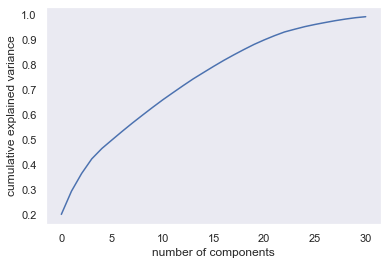

In [41]:
#pca = PCA().fit(housing_num_train_tr)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [42]:
rank_attributes=train_cat_tr[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"]]
rank_attributes

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
6,Gd,TA,Ex,TA,Ex,Gd,TA,TA
717,Gd,TA,Gd,TA,Ex,Gd,TA,TA
210,TA,TA,TA,TA,TA,TA,TA,TA
963,Gd,TA,Gd,TA,Ex,Gd,TA,TA
431,TA,TA,TA,TA,Gd,TA,TA,TA
...,...,...,...,...,...,...,...,...
131,Gd,TA,Gd,TA,Ex,Gd,TA,TA
1387,TA,Gd,TA,Gd,Ex,TA,TA,TA
132,TA,TA,TA,TA,Gd,Gd,TA,TA
1296,TA,TA,Gd,TA,Gd,TA,TA,TA


In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex']])
rank_attributes_encoded = ordinal_encoder.fit_transform(rank_attributes)
rank_attributes_encoded
rank_df = pd.DataFrame(rank_attributes_encoded, columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"], index = train_cat_tr.index )
rank_df

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
6,3.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0
717,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
210,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
963,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
431,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
131,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
1387,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0
132,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0
1296,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0


In [44]:
ordinal_encoder.categories_

[array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object)]

In [45]:
rating_attributes=train_cat_tr[["BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"]]
rating_attributes

,BsmtFinType1,BsmtFinType2,Functional,GarageFinish
6,GLQ,Unf,Typ,RFn
717,GLQ,Unf,Typ,RFn
210,Rec,Unf,Typ,Unf
963,GLQ,Unf,Typ,Fin
431,Unf,Unf,Typ,Unf
...,...,...,...,...
131,GLQ,Unf,Typ,RFn
1387,ALQ,Unf,Typ,Unf
132,Rec,Unf,Typ,Unf
1296,GLQ,Unf,Typ,Fin


In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['NA', 'Unf', 'RFn', 'Fin']])
rating_attributes_encoded = ordinal_encoder.fit_transform(rating_attributes)
rating_attributes_encoded
rating_df = pd.DataFrame(rating_attributes_encoded, columns = ["BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"], index = train_cat_tr.index)
rating_df

,BsmtFinType1,BsmtFinType2,Functional,GarageFinish
6,6.0,1.0,7.0,2.0
717,6.0,1.0,7.0,2.0
210,3.0,1.0,7.0,1.0
963,6.0,1.0,7.0,3.0
431,1.0,1.0,7.0,1.0
...,...,...,...,...
131,6.0,1.0,7.0,2.0
1387,5.0,1.0,7.0,1.0
132,3.0,1.0,7.0,1.0
1296,6.0,1.0,7.0,3.0


In [47]:
ordinal_encoder.categories

[['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 ['NA', 'Unf', 'RFn', 'Fin']]

In [48]:
clean_housing_data_cat = clean_housing_data.select_dtypes(include=['object'])
clean_housing_data_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1454,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [49]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(clean_housing_data_cat)
imputer_cat.transform(clean_housing_data_cat)
clean_housing_data_cat_tr = pd.DataFrame(imputer_cat.transform(clean_housing_data_cat), columns=clean_housing_data_cat.columns, index=clean_housing_data_cat.index)
clean_housing_data_cat_tr

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1454,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [50]:
cat_attributes = clean_housing_data_cat_tr.drop(columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond", "BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"])
cat_attributes

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,BrkFace,PConc,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,None,CBlock,Gd,GasA,Y,SBrkr,Attchd,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,BrkFace,PConc,Mn,GasA,Y,SBrkr,Attchd,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,None,BrkTil,No,GasA,Y,SBrkr,Detchd,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,BrkFace,PConc,Av,GasA,Y,SBrkr,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,None,PConc,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
1454,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Stone,CBlock,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,None,Stone,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,None,CBlock,Mn,GasA,Y,FuseA,Attchd,Y,WD,Normal


In [51]:
cat_columns = cat_attributes.columns
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_columns)])
cat_encoded = cat_pipeline.fit_transform(cat_attributes).toarray()
cat_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [53]:
cat_df = pd.DataFrame(cat_encoded, index = clean_housing_data_cat.index)
cat_df

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1454,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
train_cat_attributes = train_cat_tr.drop(columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond", "BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"])
train_cat_attributes

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Stone,PConc,Av,GasA,Y,SBrkr,Attchd,Y,WD,Normal
717,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,...,BrkFace,PConc,Gd,GasA,Y,SBrkr,Attchd,Y,WD,Normal
210,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,None,CBlock,No,GasA,N,FuseA,Attchd,Y,WD,Normal
963,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,BrkFace,PConc,No,GasA,Y,SBrkr,BuiltIn,Y,WD,Normal
431,RM,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,...,None,BrkTil,No,GasA,Y,SBrkr,Attchd,N,ConLD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,BrkFace,PConc,No,GasA,Y,SBrkr,BuiltIn,Y,WD,Normal
1387,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,None,BrkTil,No,GasA,Y,SBrkr,Detchd,Y,WD,Normal
132,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,None,CBlock,No,GasA,Y,SBrkr,Detchd,Y,WD,Normal
1296,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,BrkFace,PConc,Gd,GasA,Y,SBrkr,Basment,Y,New,Partial


In [55]:
# cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_columns)])
train_cat_encoded = cat_pipeline.transform(train_cat_attributes).toarray()
train_cat_df = pd.DataFrame(train_cat_encoded, index = train_cat_attributes.index)
# train_cat_df.sort_index(inplace=True)
train_cat_df

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
717,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
210,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
963,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
431,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1387,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
132,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1296,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
housing_train_pca_df = pd.DataFrame(housing_train_pca, index = train_num_tr_df.index)
x = pd.concat([housing_train_pca_df, train_cat_df, rating_df, rank_df], axis = 1, )
y = train_num_tr_df["SalePrice"]
housing_train = pd.concat([x,y], axis = 1)

In [57]:
print(x)
print(y)

             0         1         2         3         4         5         6  \
6     3.216094 -2.570872  0.614096 -0.379559  0.769530  0.868884 -0.455218   
717   4.629380  0.478050  0.635141 -2.471578  0.268926  0.407445  0.081765   
210  -4.638171 -1.015946  0.376339 -0.142195  0.591412 -0.169907  0.789709   
963   1.894949  1.187195 -1.062363 -2.198550  0.023614 -1.442348  1.499780   
431  -2.671137  1.380917 -0.005371  1.535501 -0.518683  0.223516 -0.089535   
...        ...       ...       ...       ...       ...       ...       ...   
131   1.645812  0.526948 -0.801120 -1.809338 -0.002311 -0.534341  0.234086   
1387 -1.879678  0.275122  0.015958 -0.029182 -0.971177  1.136161 -0.739644   
132  -0.668130 -1.091292  0.374490  0.720106  0.382588  0.193804 -0.011285   
1296 -0.600757 -1.504941 -3.468994 -1.342239  1.546946  1.052665 -0.501097   
1355 -0.557514 -1.404614  0.467788 -1.008640 -0.514570 -1.459849  1.034446   

             7         8         9  ...  Functional  GarageFini

In [58]:
housing_train

,0,1,2,3,4,5,6,7,8,9,...,GarageFinish,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice
6,3.216094,-2.570872,0.614096,-0.379559,0.769530,0.868884,-0.455218,0.351834,-0.036368,0.386420,...,2.0,3.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,1.498042
717,4.629380,0.478050,0.635141,-2.471578,0.268926,0.407445,0.081765,-1.556883,0.305719,0.883586,...,2.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.757605
210,-4.638171,-1.015946,0.376339,-0.142195,0.591412,-0.169907,0.789709,-0.485373,0.422182,0.515603,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-1.323779
963,1.894949,1.187195,-1.062363,-2.198550,0.023614,-1.442348,1.499780,-0.113071,-0.988564,0.743890,...,3.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.616625
431,-2.671137,1.380917,-0.005371,1.535501,-0.518683,0.223516,-0.089535,1.456063,0.627697,0.513770,...,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,-1.828379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.645812,0.526948,-0.801120,-1.809338,-0.002311,-0.534341,0.234086,-0.219296,-0.488146,0.807771,...,2.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.930457
1387,-1.879678,0.275122,0.015958,-0.029182,-0.971177,1.136161,-0.739644,0.394607,-0.571546,-1.784547,...,1.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,-0.606562
132,-0.668130,-1.091292,0.374490,0.720106,0.382588,0.193804,-0.011285,0.109218,-0.182890,0.794592,...,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,-0.259541
1296,-0.600757,-1.504941,-3.468994,-1.342239,1.546946,1.052665,-0.501097,0.271361,1.555871,-0.352007,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.442362


In [59]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
lin_reg = linear.fit(x,y)
lin_reg.predict(x)
housing_train["predicted"] = lin_reg.predict(x)
housing_train

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
6,3.216094,-2.570872,0.614096,-0.379559,0.769530,0.868884,-0.455218,0.351834,-0.036368,0.386420,...,3.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,1.498042,1.324028
717,4.629380,0.478050,0.635141,-2.471578,0.268926,0.407445,0.081765,-1.556883,0.305719,0.883586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.757605,1.598190
210,-4.638171,-1.015946,0.376339,-0.142195,0.591412,-0.169907,0.789709,-0.485373,0.422182,0.515603,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-1.323779,-1.371742
963,1.894949,1.187195,-1.062363,-2.198550,0.023614,-1.442348,1.499780,-0.113071,-0.988564,0.743890,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.616625,0.725250
431,-2.671137,1.380917,-0.005371,1.535501,-0.518683,0.223516,-0.089535,1.456063,0.627697,0.513770,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,-1.828379,-0.943878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.645812,0.526948,-0.801120,-1.809338,-0.002311,-0.534341,0.234086,-0.219296,-0.488146,0.807771,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.930457,0.673843
1387,-1.879678,0.275122,0.015958,-0.029182,-0.971177,1.136161,-0.739644,0.394607,-0.571546,-1.784547,...,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,-0.606562,-0.571678
132,-0.668130,-1.091292,0.374490,0.720106,0.382588,0.193804,-0.011285,0.109218,-0.182890,0.794592,...,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,-0.259541,-0.244682
1296,-0.600757,-1.504941,-3.468994,-1.342239,1.546946,1.052665,-0.501097,0.271361,1.555871,-0.352007,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.442362,-0.283363


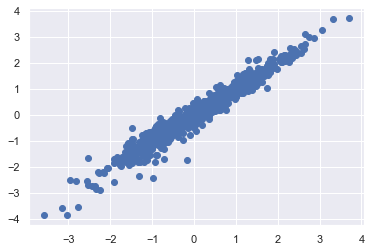

In [60]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_train['predicted'], housing_train['SalePrice']);

In [61]:
lin_reg.score(x, y)    

0.9495709945467474

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_pred = lin_reg.predict(x)
lin_mse = mean_squared_error(y, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2245640341934847

In [63]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear, x, y, scoring="neg_mean_squared_error", cv=10)
scores
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [1.63770740e+08 3.06144639e-01 7.10613694e+09 4.90205270e+08
 4.54631601e+09 2.60623580e-01 2.82281695e+09 5.37227484e+09
 1.76170418e+09 2.21871803e+09]
Mean: 2448194295.9825706
Standard deviation: 2373872030.989942


This result is very puzzle to me. The score and rmse are looking good, but cross validation scores are way off.

In [65]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso_reg = lasso.fit(x,y)
lasso_reg.predict(x)
housing_train["predicted"] = lasso_reg.predict(x)
housing_train

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
6,3.216094,-2.570872,0.614096,-0.379559,0.769530,0.868884,-0.455218,0.351834,-0.036368,0.386420,...,3.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,1.498042,1.257326
717,4.629380,0.478050,0.635141,-2.471578,0.268926,0.407445,0.081765,-1.556883,0.305719,0.883586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.757605,1.484666
210,-4.638171,-1.015946,0.376339,-0.142195,0.591412,-0.169907,0.789709,-0.485373,0.422182,0.515603,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-1.323779,-1.416629
963,1.894949,1.187195,-1.062363,-2.198550,0.023614,-1.442348,1.499780,-0.113071,-0.988564,0.743890,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.616625,0.698154
431,-2.671137,1.380917,-0.005371,1.535501,-0.518683,0.223516,-0.089535,1.456063,0.627697,0.513770,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,-1.828379,-0.907568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.645812,0.526948,-0.801120,-1.809338,-0.002311,-0.534341,0.234086,-0.219296,-0.488146,0.807771,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.930457,0.665851
1387,-1.879678,0.275122,0.015958,-0.029182,-0.971177,1.136161,-0.739644,0.394607,-0.571546,-1.784547,...,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,-0.606562,-0.578617
132,-0.668130,-1.091292,0.374490,0.720106,0.382588,0.193804,-0.011285,0.109218,-0.182890,0.794592,...,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,-0.259541,-0.274615
1296,-0.600757,-1.504941,-3.468994,-1.342239,1.546946,1.052665,-0.501097,0.271361,1.555871,-0.352007,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.442362,-0.386519


In [66]:
print(lasso_reg.coef_)
print(lasso_reg.intercept_)

[ 3.06304533e-01 -1.19086851e-02  6.65310189e-02 -3.46120539e-02
 -9.38705938e-02  1.10859966e-02  1.89116163e-02  2.63707877e-02
  4.62607774e-02  3.64438277e-03 -1.33275221e-02 -0.00000000e+00
 -1.86405800e-02 -4.32011693e-03  5.96223110e-03  0.00000000e+00
 -0.00000000e+00 -4.85548097e-02 -4.07409434e-02 -1.08725330e-02
 -2.78093423e-02  1.59958514e-02 -0.00000000e+00 -1.03505943e-01
 -2.59632724e-02 -2.38322425e-02 -3.76900242e-02 -1.27000213e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.92930005e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000

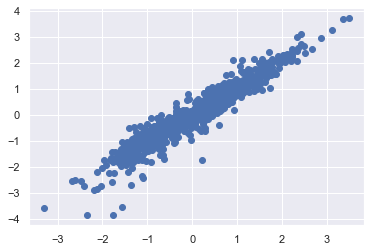

In [67]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_train['predicted'], housing_train['SalePrice']);

In [68]:
lasso_reg.score(x, y)    

0.9113225411840841

In [135]:
from sklearn.metrics import mean_squared_error
import numpy as np
lasso_pred = lasso_reg.predict(x)
lasso_mse = mean_squared_error(y, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.23903873896054087

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso, x, y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)
display_scores(lasso_rmse_scores)

Scores: [0.33765931 0.31710238 0.3485798  0.35176201 0.2870337  0.25623751
 0.26898496 0.30960168 0.33614773 0.27043504]
Mean: 0.30835441172538114
Standard deviation: 0.03371973583966684


In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge_reg = ridge.fit(x,y)
ridge_reg.predict(x)
housing_train["predicted"] = ridge_reg.predict(x)
housing_train

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
6,3.216094,-2.570872,0.614096,-0.379559,0.769530,0.868884,-0.455218,0.351834,-0.036368,0.386420,...,3.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,1.498042,1.324878
717,4.629380,0.478050,0.635141,-2.471578,0.268926,0.407445,0.081765,-1.556883,0.305719,0.883586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.757605,1.594996
210,-4.638171,-1.015946,0.376339,-0.142195,0.591412,-0.169907,0.789709,-0.485373,0.422182,0.515603,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-1.323779,-1.370148
963,1.894949,1.187195,-1.062363,-2.198550,0.023614,-1.442348,1.499780,-0.113071,-0.988564,0.743890,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.616625,0.722432
431,-2.671137,1.380917,-0.005371,1.535501,-0.518683,0.223516,-0.089535,1.456063,0.627697,0.513770,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,-1.828379,-0.945940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.645812,0.526948,-0.801120,-1.809338,-0.002311,-0.534341,0.234086,-0.219296,-0.488146,0.807771,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.930457,0.674431
1387,-1.879678,0.275122,0.015958,-0.029182,-0.971177,1.136161,-0.739644,0.394607,-0.571546,-1.784547,...,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,-0.606562,-0.572845
132,-0.668130,-1.091292,0.374490,0.720106,0.382588,0.193804,-0.011285,0.109218,-0.182890,0.794592,...,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,-0.259541,-0.244428
1296,-0.600757,-1.504941,-3.468994,-1.342239,1.546946,1.052665,-0.501097,0.271361,1.555871,-0.352007,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.442362,-0.283094


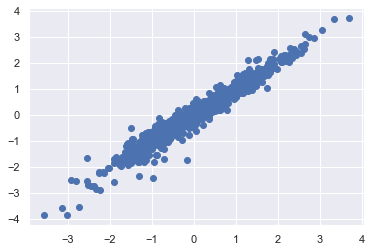

In [75]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_train['predicted'], housing_train['SalePrice']);

In [76]:
ridge_reg.score(x, y)    

0.949545541426935

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np
ridge_pred = ridge_reg.predict(x)
ridge_mse = mean_squared_error(y, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.22462069934239123

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)
display_scores(ridge_rmse_scores)

Scores: [0.29936772 0.3046202  0.30137869 0.26999605 0.28053148 0.25721288
 0.251998   0.28498669 0.36922361 0.25827505]
Mean: 0.28775903767310146
Standard deviation: 0.03270734496231771


In [79]:
test_cat = test_set.select_dtypes(include=['object'])
test_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
468,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
552,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,SBrkr,Gd,Typ,Detchd,Fin,TA,TA,N,WD,Normal
978,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1450,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Basment,Fin,TA,TA,Y,WD,Normal
1088,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
873,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
402,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal
707,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,New,Partial


In [80]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(test_cat)
imputer_cat.transform(test_cat)
test_cat_tr = pd.DataFrame(imputer_cat.transform(test_cat), columns=test_cat.columns, index=test_cat.index)
test_cat_tr

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
468,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
552,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,SBrkr,Gd,Typ,Detchd,Fin,TA,TA,N,WD,Normal
978,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1450,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,Basment,Fin,TA,TA,Y,WD,Normal
1088,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
873,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
402,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal
707,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,New,Partial


In [81]:
test_num =test_set.select_dtypes(exclude=['object'])
test_num

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
468,20,9.343822,8,5,2006,2006,248.0,0,0,1626,...,0,44,0,0,0,0,0,5,2007,12.429216
552,20,9.079890,4,5,1949,2003,0.0,0,0,0,...,0,96,0,0,0,0,0,5,2009,11.589887
978,20,9.084324,5,6,1963,1963,0.0,651,0,470,...,0,80,0,0,0,0,0,6,2009,11.842229
1450,180,8.209308,5,5,2005,2005,80.0,547,0,0,...,0,28,0,0,0,0,0,5,2006,11.884489
1088,120,8.106515,8,5,2005,2005,0.0,1039,0,208,...,0,84,0,0,0,0,0,4,2006,12.190959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,160,7.860185,5,3,1976,1976,0.0,129,232,175,...,182,0,0,0,0,0,0,4,2010,11.350407
873,50,8.651724,5,6,1941,1950,0.0,0,0,676,...,26,0,0,0,0,0,0,8,2009,11.104957
402,30,9.230143,5,8,1940,1997,0.0,0,0,672,...,168,0,0,0,0,0,0,8,2008,11.589887
707,60,9.106978,7,5,2007,2007,0.0,0,0,728,...,100,24,0,0,0,0,0,7,2007,12.098153


In [82]:
test_num_tr = num_pipeline.transform(test_num)
test_num_tr_df = pd.DataFrame(test_num_tr, columns=test_num.columns, index=test_num.index)
test_num_tr_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
468,-0.870328,0.438973,1.370578,-0.509352,1.151408,1.033835,0.752983,-1.016989,-0.289616,2.368052,...,-0.774942,-0.028402,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,-0.602622,0.990489
552,-0.870328,-0.079280,-1.516542,-0.509352,-0.739996,0.889749,-0.580175,-1.016989,-0.289616,-1.285765,...,-0.774942,0.773241,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,0.913024,-1.083668
978,-0.870328,-0.070574,-0.794762,0.391275,-0.275440,-1.031407,-0.580175,0.478159,-0.289616,-0.229618,...,-0.774942,0.526582,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.132752,0.913024,-0.460077
1450,2.974188,-1.788742,-0.794762,-0.509352,1.118225,0.985807,-0.150124,0.239303,-0.289616,-1.285765,...,-0.774942,-0.275061,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,-1.360445,-0.355644
1088,1.532494,-1.990587,1.370578,-0.509352,1.118225,0.985807,-0.580175,1.369277,-0.289616,-0.818364,...,-0.774942,0.588247,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,-1.360445,0.401706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.493623,-2.474276,-0.794762,-2.310606,0.155932,-0.407032,-0.580175,-0.720715,1.259532,-0.892519,...,0.693393,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,1.670848,-1.675472
873,-0.149481,-0.920021,-0.794762,0.391275,-1.005456,-1.655783,-0.580175,-1.016989,-0.289616,0.233288,...,-0.565180,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.913024,-2.282028
402,-0.630046,0.215755,-0.794762,2.192529,-1.038638,0.601575,-0.580175,-1.016989,-0.289616,0.224300,...,0.580444,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.155201,-1.083668
707,0.090801,-0.026090,0.648798,-0.509352,1.184590,1.081864,-0.580175,-1.016989,-0.289616,0.350139,...,0.031836,-0.336726,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,-0.602622,0.172364


In [83]:
housing_num_test_tr = test_num_tr_df.drop("SalePrice", axis=1)
housing_test_label = test_num_tr_df["SalePrice"].copy()
housing_num_test_tr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
468,-0.870328,0.438973,1.370578,-0.509352,1.151408,1.033835,0.752983,-1.016989,-0.289616,2.368052,...,1.838057,-0.774942,-0.028402,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,-0.602622
552,-0.870328,-0.079280,-1.516542,-0.509352,-0.739996,0.889749,-0.580175,-1.016989,-0.289616,-1.285765,...,0.221486,-0.774942,0.773241,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,0.913024
978,-0.870328,-0.070574,-0.794762,0.391275,-0.275440,-1.031407,-0.580175,0.478159,-0.289616,-0.229618,...,0.034599,-0.774942,0.526582,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.132752,0.913024
1450,2.974188,-1.788742,-0.794762,-0.509352,1.118225,0.985807,-0.150124,0.239303,-0.289616,-1.285765,...,0.244847,-0.774942,-0.275061,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.494719,-1.360445
1088,1.532494,-1.990587,1.370578,-0.509352,1.118225,0.985807,-0.580175,1.369277,-0.289616,-0.818364,...,0.361651,-0.774942,0.588247,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,-1.360445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.493623,-2.474276,-0.794762,-2.310606,0.155932,-0.407032,-0.580175,-0.720715,1.259532,-0.892519,...,-0.638194,0.693393,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,-0.856686,1.670848
873,-0.149481,-0.920021,-0.794762,0.391275,-1.005456,-1.655783,-0.580175,-1.016989,-0.289616,0.233288,...,-1.273609,-0.565180,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.913024
402,-0.630046,0.215755,-0.794762,2.192529,-1.038638,0.601575,-0.580175,-1.016989,-0.289616,0.224300,...,-1.086722,0.580444,-0.706715,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.591182,0.155201
707,0.090801,-0.026090,0.648798,-0.509352,1.184590,1.081864,-0.580175,-1.016989,-0.289616,0.350139,...,-0.339175,0.031836,-0.336726,-0.35267,-0.124353,-0.273426,-0.05843,-0.086506,0.229215,-0.602622


In [84]:
# from sklearn.decomposition import PCA
# pca = PCA(0.99)
housing_test_pca = pca.transform(housing_num_test_tr)
housing_test_pca

array([[ 3.466585  , -0.82196668, -0.56710115, ..., -0.0965504 ,
        -0.07030237,  0.16643575],
       [-1.84299691, -0.63533782, -1.58749735, ...,  0.75961722,
         1.10477745,  0.73630626],
       [-1.67399186, -1.57322214,  0.80044938, ..., -0.11122692,
         0.16039951,  0.14427078],
       ...,
       [-4.2192668 , -0.65158325, -0.31623605, ..., -1.03533971,
        -0.30395873, -0.23739946],
       [ 1.09819034,  1.54175772, -2.35706799, ..., -0.10753269,
        -0.18309333, -0.65574645],
       [ 4.71513165, -0.87462885,  2.31897546, ..., -0.28455657,
         0.17820489, -0.01349703]])

In [85]:
print(pca.components_)

[[-0.00733342  0.14438855  0.30807361 ... -0.02362521  0.01662462
  -0.01245342]
 [ 0.17928573 -0.01467251 -0.0216522  ... -0.00492558  0.0216894
  -0.05699537]
 [-0.27849179  0.38657296 -0.07950615 ...  0.02564625  0.02237706
   0.02450869]
 ...
 [-0.0131668  -0.03641664 -0.26122184 ...  0.00115494  0.01867463
  -0.00957771]
 [ 0.00630436 -0.01401276  0.18790328 ...  0.02104904 -0.0026309
  -0.00688935]
 [-0.09320603 -0.07301281  0.1867083  ...  0.00370417 -0.04126605
  -0.02846341]]


In [86]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.00836966 3.2621299  2.48591225 2.05417053 1.46280125 1.20906666
 1.19731371 1.16018196 1.11606187 1.09401682 1.06074815 0.99925426
 0.98738351 0.9564533  0.87797071 0.87044886 0.83847856 0.78684757
 0.75140272 0.71806936 0.63351862 0.58598202 0.52889409 0.38251497
 0.36650334 0.30351721 0.27267768 0.26001298 0.22481725 0.1936119
 0.14081031]
[0.20006755 0.09312385 0.0709652  0.05864029 0.04175851 0.03451516
 0.03417965 0.03311965 0.03186016 0.03123084 0.03028112 0.02852566
 0.02818678 0.02730382 0.02506338 0.02484866 0.023936   0.02246209
 0.02145025 0.02049869 0.01808502 0.016728   0.01509831 0.01091963
 0.01046255 0.00866449 0.00778412 0.00742258 0.00641785 0.00552703
 0.0040197 ]


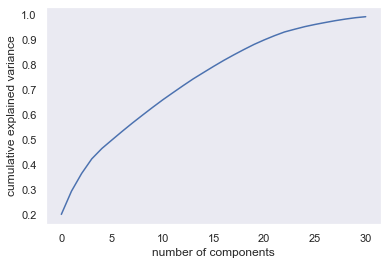

In [87]:
#pca = PCA().fit(housing_num_train_tr)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [88]:
test_rank_attributes=test_cat_tr[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"]]
test_rank_attributes

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
468,Gd,TA,Gd,TA,Ex,Gd,TA,TA
552,TA,TA,Gd,TA,Ex,Gd,TA,TA
978,TA,TA,TA,TA,TA,TA,TA,TA
1450,TA,TA,Gd,TA,Gd,TA,TA,TA
1088,Gd,TA,Gd,TA,Ex,Gd,TA,TA
...,...,...,...,...,...,...,...,...
344,TA,TA,Gd,TA,TA,TA,TA,TA
873,TA,TA,TA,TA,Ex,TA,TA,TA
402,TA,TA,TA,TA,Ex,TA,TA,TA
707,Gd,TA,Gd,TA,Ex,Gd,TA,TA


In [89]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex'],['Po', 'Fa', 'TA', 'Gd', 'Ex']])
test_rank_attributes_encoded = ordinal_encoder.fit_transform(test_rank_attributes)
test_rank_df = pd.DataFrame(test_rank_attributes_encoded, columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"], index = test_cat_tr.index )
test_rank_df

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
468,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
552,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
978,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1450,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0
1088,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...
344,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
873,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0
402,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0
707,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0


In [90]:
ordinal_encoder.categories_

[array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object)]

In [91]:
test_rating_attributes=test_cat_tr[["BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"]]
test_rating_attributes

,BsmtFinType1,BsmtFinType2,Functional,GarageFinish
468,Unf,Unf,Typ,RFn
552,Unf,Unf,Typ,Fin
978,Rec,Unf,Typ,Unf
1450,GLQ,Unf,Typ,Fin
1088,GLQ,Unf,Typ,Fin
...,...,...,...,...
344,Rec,BLQ,Typ,Unf
873,Unf,Unf,Typ,Unf
402,Unf,Unf,Typ,Unf
707,Unf,Unf,Typ,Fin


In [92]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['NA', 'Unf', 'RFn', 'Fin']])
test_rating_attributes_encoded = ordinal_encoder.fit_transform(test_rating_attributes)
test_rating_df = pd.DataFrame(test_rating_attributes_encoded, columns = ["BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"], index = test_cat_tr.index)
test_rating_df

,BsmtFinType1,BsmtFinType2,Functional,GarageFinish
468,1.0,1.0,7.0,2.0
552,1.0,1.0,7.0,3.0
978,3.0,1.0,7.0,1.0
1450,6.0,1.0,7.0,3.0
1088,6.0,1.0,7.0,3.0
...,...,...,...,...
344,3.0,4.0,7.0,1.0
873,1.0,1.0,7.0,1.0
402,1.0,1.0,7.0,1.0
707,1.0,1.0,7.0,3.0


In [93]:
ordinal_encoder.categories

[['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 ['NA', 'Unf', 'RFn', 'Fin']]

In [94]:
test_cat_attributes = test_cat_tr.drop(columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond", "BsmtFinType1", "BsmtFinType2", "Functional", "GarageFinish"])
test_cat_attributes

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition
468,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,Stone,PConc,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
552,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,None,CBlock,No,GasA,Y,SBrkr,Detchd,N,WD,Normal
978,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,...,None,PConc,No,GasA,Y,SBrkr,Detchd,Y,WD,Normal
1450,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,BrkFace,PConc,Gd,GasA,Y,SBrkr,Basment,Y,WD,Normal
1088,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,None,PConc,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,None,CBlock,No,GasA,Y,SBrkr,Attchd,Y,WD,Normal
873,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,None,CBlock,No,GasA,Y,SBrkr,Detchd,Y,WD,Abnorml
402,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,None,PConc,No,GasA,Y,SBrkr,Detchd,N,WD,Normal
707,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,None,PConc,Av,GasA,Y,SBrkr,Attchd,Y,New,Partial


In [95]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

# cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_columns)])
test_cat_encoded = cat_pipeline.transform(test_cat_attributes).toarray()
test_cat_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [96]:
test_cat_df = pd.DataFrame(test_cat_encoded, index = test_cat_tr.index)
test_cat_df

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
468,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
552,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
978,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1450,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1088,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
873,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
402,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
707,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
housing_test_pca_df = pd.DataFrame(housing_test_pca, index = test_num_tr_df.index)
X = pd.concat([housing_test_pca_df, test_cat_df, test_rating_df, test_rank_df], axis = 1, )
Y = test_num_tr_df["SalePrice"]
housing_test = pd.concat([X,Y], axis = 1)

In [98]:
print(X)
print(Y)

             0         1         2         3         4         5         6  \
468   3.466585 -0.821967 -0.567101  3.478997 -0.057895 -0.105808  0.349653   
552  -1.842997 -0.635338 -1.587497  0.472003 -0.189858 -0.532715  0.666148   
978  -1.673992 -1.573222  0.800449  0.047236  0.304382 -0.804738  0.123155   
1450 -1.372385 -1.756241 -3.202995 -1.491700  1.457148  0.797334 -0.380459   
1088  0.468865 -2.830682 -2.677571 -1.599247  0.078827  0.529695 -0.112727   
...        ...       ...       ...       ...       ...       ...       ...   
344  -3.094175  0.843281 -3.424516 -1.947324  0.917182 -0.731147  1.006140   
873  -3.759770  1.510242 -0.498795  0.022458 -0.670276 -0.793990 -0.276348   
402  -4.219267 -0.651583 -0.316236  0.950457 -1.651558  0.169775  0.137971   
707   1.098190  1.541758 -2.357068  0.089419 -0.778599  0.424490  0.094145   
1043  4.715132 -0.874629  2.318975  0.801842  0.865165 -0.142859  0.539478   

             7         8         9  ...  Functional  GarageFini

In [99]:
housing_test

,0,1,2,3,4,5,6,7,8,9,...,GarageFinish,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,2.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364


In [100]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
lin_reg = linear.fit(x,y)
housing_test["predicted"] = linear.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,0.980789
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-1.200706
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.571388
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.664116
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,0.430664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.631004
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.336052
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-1.082832
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,0.349899


In [101]:
housing_test[["SalePrice","predicted"]].max()


SalePrice    3.201504e+00
predicted    3.916191e+08
dtype: float64

In [102]:
# get rid of outlier result
lin_result = housing_test[housing_test["predicted"] < 1e+06]
lin_result = lin_result[lin_result["predicted"] > -1]

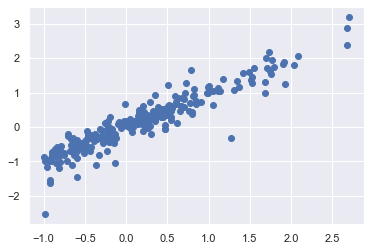

In [103]:
#scatter plot of predicted vs true sale price
plt.scatter(lin_result['predicted'], lin_result['SalePrice']);

In [105]:
from sklearn.metrics import accuracy_score
lin_reg.score(X, Y)    

-769105625944005.8

In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_pred = lin_reg.predict(X)
lin_mse = mean_squared_error(Y, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25905500.32699333

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [4.44135120e-01 5.54380830e-01 4.12743247e-01 1.48241192e+11
 4.16251286e-01 5.83430833e-01 9.67140743e-01 3.19350914e-01
 1.76947771e+11 3.87136098e-01]
Mean: 32518896251.436836
Standard deviation: 65353789762.248375


In [108]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso_reg = lasso.fit(x,y)
lasso_reg.predict(X)
housing_test["predicted"] = lasso_reg.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,0.941216
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-1.115562
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.610466
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.706883
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,0.465062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.519195
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.378505
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-1.086289
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,0.404559


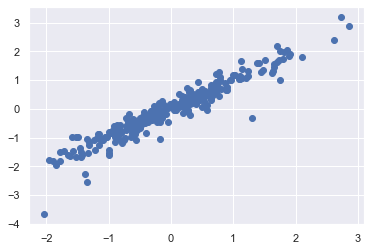

In [109]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_test['predicted'], housing_test['SalePrice']);

In [110]:
print(lasso_reg.coef_)
print(lasso_reg.intercept_)

[ 2.69968940e-01  0.00000000e+00  9.44486988e-02 -3.59945034e-02
 -8.61193722e-02  1.83587084e-02  3.52759461e-02  3.26231952e-02
  5.23421347e-02  1.57124511e-02 -1.98599554e-02 -4.25257043e-03
 -2.79261057e-02 -1.95552284e-02  1.57764290e-03  0.00000000e+00
 -0.00000000e+00 -4.54387135e-02 -3.74757392e-02 -6.98402563e-03
 -2.01657215e-02  2.90639080e-02 -1.32113350e-02 -1.19425752e-01
 -4.35850558e-02 -2.63492123e-02 -5.30253361e-02 -3.17025380e-02
  1.31265983e-02  1.62072336e-02  1.05088980e-02 -7.96432507e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.78212231e-02
 -0.00000000e+00  0.00000000e+00 -1.43750304e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.88793798e-02  5.20342114e-02 -5.54190388e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  9.14564746e-02
  6.13499197e-02 -4.96861

In [111]:
lasso_reg.score(X, Y)    

0.9132878305027244

In [112]:
from sklearn.metrics import mean_squared_error
import numpy as np
lasso_pred = lasso_reg.predict(X)
lasso_mse = mean_squared_error(Y, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.27506733289770696

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso, X, Y, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)
display_scores(lasso_rmse_scores)

Scores: [0.34013434 0.42609505 0.3944314  0.36319536 0.27488416 0.29243475
 0.29349424 0.27849065 0.30308879 0.33828048]
Mean: 0.33045292201411824
Standard deviation: 0.04880145216448492


In [114]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge_reg = ridge.fit(x,y)
ridge_reg.predict(X)
housing_test["predicted"] = ridge_reg.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,0.980043
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-1.202370
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.571747
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.663343
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,0.433200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.626719
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.338721
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-1.082922
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,0.351429


In [115]:
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[ 0.25567986 -0.00385359  0.11276261 -0.03145549 -0.07948955  0.01389343
  0.03048717  0.03367285  0.04097619  0.01477622 -0.01400041 -0.0050221
 -0.02559076 -0.01147338 -0.00684336  0.00585592  0.00260846 -0.0486881
 -0.03200234 -0.0079319  -0.01659639  0.03504903 -0.00696578 -0.11736404
 -0.04057423 -0.0407058  -0.04490286 -0.0231231   0.01889881  0.01663557
  0.02142161 -0.81256757  0.19911362  0.29514362  0.17879203  0.1395183
 -0.05460284  0.05460284 -0.06303357 -0.01106696  0.10584979 -0.03174926
  0.02295982  0.02785559 -0.06472322  0.01390782  0.31963281 -0.31963281
  0.06024891  0.11724192 -0.06120439 -0.15162926  0.03534281  0.03568617
  0.07934611 -0.11503228  0.08500281  0.04519777 -0.06399358  0.041439
  0.0819698  -0.03253205  0.23119907 -0.22297467 -0.0312645  -0.15136566
 -0.27028396 -0.10664677 -0.08449281  0.0453896  -0.13386873  0.14537215
  0.16216035 -0.08603159 -0.05302953 -0.02956695 -0.01858282  0.13816425
  0.31656218 -0.03900054  0.03117718 -0.09818635 -0.0452

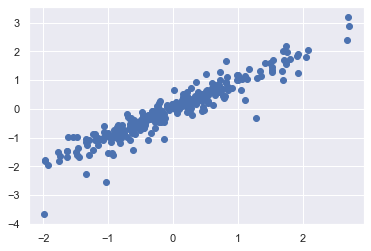

In [116]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_test['predicted'], housing_test['SalePrice']);

In [117]:
ridge_reg.score(X, Y)    

0.8934348317157368

In [118]:
from sklearn.metrics import mean_squared_error
import numpy as np
ridge_pred = ridge_reg.predict(X)
ridge_mse = mean_squared_error(Y, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.3049345457184448

In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, X, Y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)
display_scores(ridge_rmse_scores)

Scores: [0.40101811 0.51732147 0.44573121 0.48926331 0.36420534 0.39207421
 0.33591157 0.33183776 1.29389309 0.381345  ]
Mean: 0.4952601073404484
Standard deviation: 0.2725013974094529


In [120]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor().fit(x,y)
tree_reg.predict(X)
housing_test["predicted"] = tree_reg.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,0.751991
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-1.273854
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.451204
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.355644
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,0.219535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.547989
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.038323
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-0.864834
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,0.178688


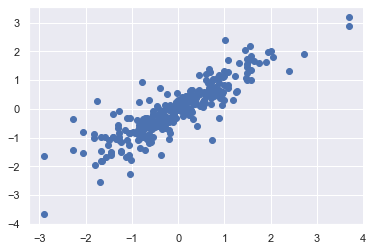

In [121]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_test['predicted'], housing_test['SalePrice']);

In [122]:
tree_reg.score(X, Y)

0.743127038268224

In [123]:
from sklearn.metrics import mean_squared_error
tree_pred = tree_reg.predict(X)
tree_mse = mean_squared_error(Y, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.47343262978458206

In [124]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.40477667 0.44622879 0.47513462 0.47668263 0.4086548  0.40643549
 0.52498714 0.40224624 0.45484207 0.54562821]
Mean: 0.4545616646982733
Standard deviation: 0.04886100669371155


In [125]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)
forest_reg.predict(X)
housing_test["predicted"] = forest_reg.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,1.082273
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-0.770232
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.515254
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.461343
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,0.155448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.573377
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.034007
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-1.414828
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,0.178848


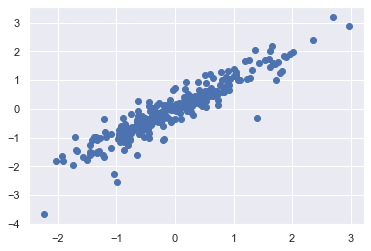

In [126]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_test['predicted'], housing_test['SalePrice']);

In [127]:
forest_reg.score(X, Y)

0.8721030125703932

In [128]:
forest_pred = forest_reg.predict(X)
forest_mse = mean_squared_error(Y, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3340635930089193

In [129]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.28778909 0.47772616 0.5436612  0.52372021 0.41244433 0.31601551
 0.4173791  0.37532448 0.46301504 0.36696199]
Mean: 0.4184037102569532
Standard deviation: 0.0802324646188264


In [130]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x, y)
Y_model = knn.predict(X)
housing_test["predicted"] = knn.predict(X)
housing_test

,0,1,2,3,4,5,6,7,8,9,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice,predicted
468,3.466585,-0.821967,-0.567101,3.478997,-0.057895,-0.105808,0.349653,-0.520018,0.066189,-0.145586,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.990489,1.051992
552,-1.842997,-0.635338,-1.587497,0.472003,-0.189858,-0.532715,0.666148,0.310520,-0.741784,0.776348,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,-1.083668,-0.442362
978,-1.673992,-1.573222,0.800449,0.047236,0.304382,-0.804738,0.123155,-0.193493,-0.200688,0.756998,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.460077,-0.627400
1450,-1.372385,-1.756241,-3.202995,-1.491700,1.457148,0.797334,-0.380459,-0.067774,1.307345,-0.431292,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,-0.355644,-0.305037
1088,0.468865,-2.830682,-2.677571,-1.599247,0.078827,0.529695,-0.112727,-0.968481,2.129696,-0.274264,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.401706,-0.176529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-3.094175,0.843281,-3.424516,-1.947324,0.917182,-0.731147,1.006140,-0.586189,-0.722180,-1.834363,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,-1.675472,-1.589757
873,-3.759770,1.510242,-0.498795,0.022458,-0.670276,-0.793990,-0.276348,-0.581412,-0.551683,0.098245,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-2.282028,-1.038323
402,-4.219267,-0.651583,-0.316236,0.950457,-1.651558,0.169775,0.137971,1.323740,-0.358936,0.493673,...,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,-1.083668,-1.049582
707,1.098190,1.541758,-2.357068,0.089419,-0.778599,0.424490,0.094145,-0.274641,-0.799455,0.224276,...,3.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,0.172364,-0.177559


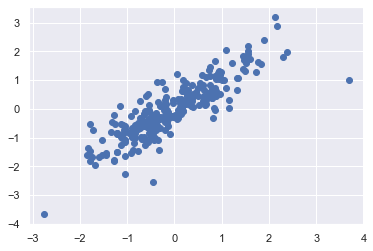

In [131]:
#scatter plot of predicted vs true sale price
plt.scatter(housing_test['predicted'], housing_test['SalePrice']);

In [132]:
knn.score(X, Y)

0.7408350603512104

In [133]:
from sklearn.metrics import mean_squared_error
knn_pred = knn.predict(X)
knn_mse = mean_squared_error(Y, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.47554006722888975

In [134]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X,Y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.28408254 0.45507591 0.54185821 0.51479055 0.40756935 0.30766753
 0.40648472 0.34592638 0.43412134 0.37127334]
Mean: 0.4068849860013903
Standard deviation: 0.0792684546741465
